# 0.0 - Imports

In [33]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [34]:
warnings.filterwarnings("ignore")

# 1.0 - Load Data

In [35]:
# Load Dataset
X = pd.read_csv("../data/clustering_X_dataset.csv")

# 2.0 - K-Means

## Parameters
- `K`

## 2.1 - Elbow Method

In [36]:
n_clusters = np.arange(2, 11)
init = "k-means++"
n_init = 10

ss_list = []
inertia_list = []

In [37]:
# Find best K
for c in n_clusters:
    kmeans = KMeans(
        n_clusters=c,
        init=init,
        n_init=n_init,
        random_state=42,
    )

    # Prevendo
    labels = kmeans.fit_predict(X)

    # Testando performance
    ss = mt.silhouette_score(X, labels)
    ss_list.append(ss)

    inertia_list.append(kmeans.inertia_)

    print(f"For n_clusters = {c} - The Average SS = {ss}")

For n_clusters = 2 - The Average SS = 0.213219480988304
For n_clusters = 3 - The Average SS = 0.23295918228054466
For n_clusters = 4 - The Average SS = 0.2303056525569282
For n_clusters = 5 - The Average SS = 0.18676549238556106
For n_clusters = 6 - The Average SS = 0.2236781175930215


For n_clusters = 7 - The Average SS = 0.1922717886677309
For n_clusters = 8 - The Average SS = 0.17509760540307095
For n_clusters = 9 - The Average SS = 0.17435725027940244
For n_clusters = 10 - The Average SS = 0.17455018419981466


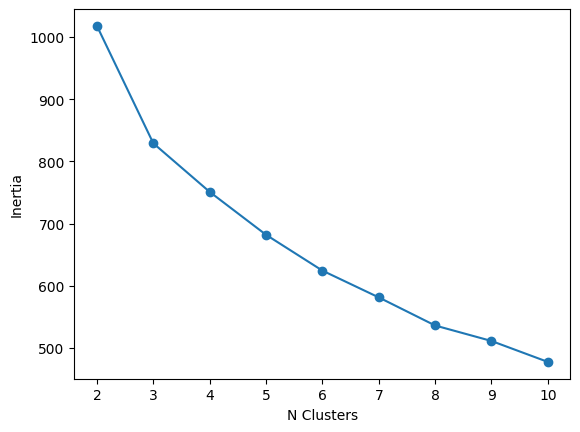

In [38]:
plt.plot(n_clusters, inertia_list, marker="o", label="Inertia")
plt.xlabel("N Clusters")
plt.ylabel("Inertia")
plt.show()

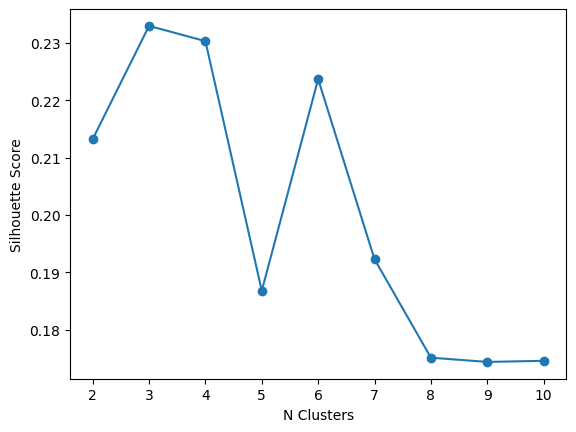

In [39]:
plt.plot(n_clusters, ss_list, marker="o", label="Inertia")
plt.xlabel("N Clusters")
plt.ylabel("Silhouette Score")
plt.show()

## 2.2 - Final Model

In [40]:
best_k = 3

# Treinando e Prevendo
kmeans = KMeans(n_clusters=best_k, init="k-means++", n_init=10)
labels = kmeans.fit_predict(X)

# Testando performance
final_ss = mt.silhouette_score(X, labels)
final_ss

0.23295918228054466

## 2.2 - PCA

Text(0.5, 1.0, 'Wine Quality Cluster')

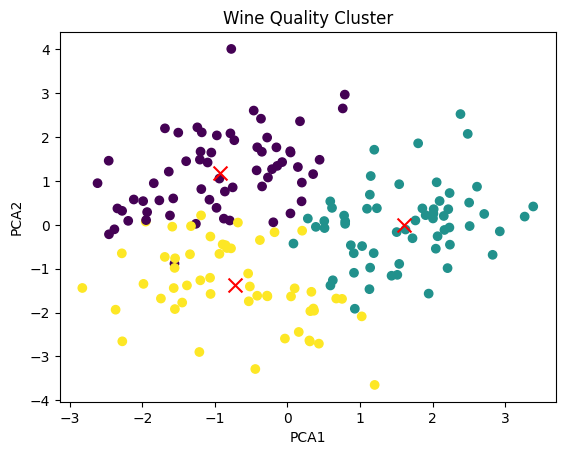

In [41]:
# Reduce X
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)
reduced_X = pd.DataFrame(data=reduced_X, columns=["PC1", "PC2"])
reduced_X.head()

# reduced centers
centers = pca.transform(kmeans.cluster_centers_)
centers

# Scatter Plot
plt.scatter(reduced_X["PC1"], reduced_X["PC2"], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=100, c="red")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Wine Quality Cluster")

# 3.0 - Save Results

In [42]:
train_metrics = {
    "Algorithm": "K-Means",
    "N Clusters": best_k,
    "Average Silhouette Score": np.round(final_ss, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv("./clustering_metrics.csv")